### Case Study - Facial Recognition with Machine Learning Using SVM and PCA

The purpose of this case study is to show you a practical application of Machine Learning with SVM (Support Vector Machines) and PCA (Principal Component Analysis) algorithms for dimensionality reduction.

### Problem Definition

We will create a model for facial recognition, using SVM and PCA.

This approach treats face recognition as a 2-dimensional recognition problem, taking advantage of the fact that faces are usually in an upright position and therefore can be described by a small set of 2D features. Face images are projected in a resource space(face space) that best encodes the variation between known face images.

The PCA is applied to reduce the dimensionality of the data and then train the SVM model for a classification task.

### Loading Packages

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from sklearn import datasets
from sklearn import decomposition
from sklearn import svm
from sklearn.model_selection import train_test_split

### Loading the Dataset

We will use the **Dataset Labeled Faces in the Wild Home**, which gives us a image faces set prepared for Computer Vision tasks. The dataset can be downloaded from http://vis-www.cs.umass.edu/lfw/, but it is already available on Keras, the most widely used Deep Learning framework today.

The download is performed when the below cell is executed for the first time. We will download at least 70 images per person, with a scaling factor of 0.4.

In [2]:
dataset_faces = datasets.fetch_lfw_people(min_faces_per_person = 70, resize = 0.4)

In [3]:
dataset_faces.data.shape

(1288, 1850)

In [4]:
print(dataset_faces.data)

[[254.       254.       251.66667  ...  87.333336  88.666664  86.666664]
 [ 39.666668  50.333332  47.       ... 117.666664 115.       133.66667 ]
 [ 89.333336 104.       126.       ... 175.33333  183.33333  183.      ]
 ...
 [ 86.        80.333336  74.666664 ...  44.        49.666668  44.666668]
 [ 50.333332  65.666664  88.       ... 197.       179.33333  166.33333 ]
 [ 30.        27.        32.666668 ...  35.        35.333332  61.      ]]


### Preparing the Dataset

**Let's extract the image shapes details**

In [5]:
n_samples, height, width = dataset_faces.images.shape

In [6]:
print(f'Samples Number: {n_samples}')
print(f'Images Height: {height}')
print(f'Images Width: {width}')

Samples Number: 1288
Images Height: 50
Images Width: 37


We have 1288 images, each one with the dimensions of 50x37 pixels.

When we load data with Keras, it offers two attributes for the dataset: data and target.
We'll store the data in **x** (input variables) and the target in **y** (output variable).

In [7]:
x = dataset_faces.data
y = dataset_faces.target

In [8]:
n_attributes = x.shape[1]

target_names = dataset_faces.target_names
n_classes = target_names.shape[0]

print(f'Number of Attributes: {n_attributes}')
print(f'Number of Classes: {n_classes}')

Number of Attributes: 1850
Number of Classes: 7


The value of 1850 represents the number of pixels that we will be working with to train the model. There are 1850 variables in the dataset, each one representing a pixel.

The value of 7 represents the number of people that our model can classify. That is, we have pictures of 7 different people.

In [9]:
print(x)

[[254.       254.       251.66667  ...  87.333336  88.666664  86.666664]
 [ 39.666668  50.333332  47.       ... 117.666664 115.       133.66667 ]
 [ 89.333336 104.       126.       ... 175.33333  183.33333  183.      ]
 ...
 [ 86.        80.333336  74.666664 ...  44.        49.666668  44.666668]
 [ 50.333332  65.666664  88.       ... 197.       179.33333  166.33333 ]
 [ 30.        27.        32.666668 ...  35.        35.333332  61.      ]]


In [10]:
print(y)

[5 6 3 ... 5 3 5]


### Dataset Summary

In [11]:
print('Total Dataset Size\n')
print(f'Samples Number: {n_samples}')
print(f'Number of Attributes: {n_attributes}')
print(f'Number of Classes: {n_classes}')

Total Dataset Size

Samples Number: 1288
Number of Attributes: 1850
Number of Classes: 7


### Data Visualization

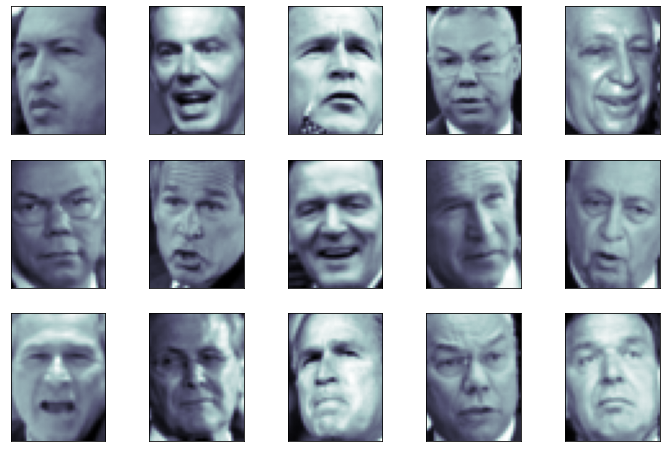

In [12]:
fig = plt.figure(figsize = (12, 8))

for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks = [], yticks = [])
    ax.imshow(dataset_faces.images[i], cmap = plt.cm.bone)

### Dataset Distribution Visualization

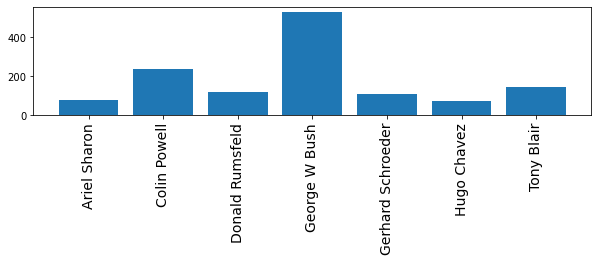

In [13]:
plt.figure(figsize = (10, 2))

unique_targets = np.unique(dataset_faces.target)
counts = [(dataset_faces.target == i).sum() for i in unique_targets]

plt.xticks(unique_targets, dataset_faces.target_names[unique_targets])
locs, labels = plt.xticks()
plt.setp(labels, rotation = 90, size = 14)
_ = plt.bar(unique_targets, counts)

These faces have already been located and resized to a common size. This is an important pre-processing factor for facial recognition, and it's a process that may require a large collection of training data. This can be done with Scikit-Learn, but the challenge is to gather enough training data for the algorithm to work.

We need to split the data into training and testing, as in any Machine Learning model.

In [14]:
x_training, \
x_test, \
y_training, \
y_test = train_test_split(
            dataset_faces.data, 
            dataset_faces.target, 
            random_state = 0)

In [15]:
print(x_training.shape, x_test.shape)

(966, 1850) (322, 1850)


For Training: 966 images and 1850 attributes (images pixels).<br />
For Test: 322 images and 1850 attributes (images pixels).

### Pre-Processing: Principal Component Analysis (PCA)

The 1850 attributes represent 1850 dimensions, which is a lot for SVM models. We can use the PCA to reduce these 1850 resources to a manageable level while keeping most of the information in the dataset. Here it is useful to use a variant of the PCA called **RandomizedPCA**, which is an approximation of the PCA that can be much faster for large datasets.

Let's create the PCA model with 150 components, each one will have the same information as a group of variables. In this way, we will reduce the dimensions from 1850 to 150.

In [16]:
pca = decomposition.PCA(
    n_components = 150,
    whiten = True,
    random_state = 1999,
    svd_solver = 'randomized'
)

In [17]:
pca.fit(x_training)

PCA(n_components=150, random_state=1999, svd_solver='randomized', whiten=True)

In [18]:
x_training_pca = pca.transform(x_training)
x_test_pca = pca.transform(x_test)

print(f'Training Shape: {x_training_pca.shape}')
print(f'Test Shape: {x_test_pca.shape}')

Training Shape: (966, 150)
Test Shape: (322, 150)


These 150 components correspond to factors in a linear combination of images, so that the combination approaches to the original face. In general, PCA can be a powerful pre-processing technique that can significantly improve classification performance.

### Machine Learning Model Construction with SVM

In [19]:
model_svm = svm.SVC(C = 5., gamma = 0.001)

In [20]:
model_svm.fit(x_training_pca, y_training)

SVC(C=5.0, gamma=0.001)

### Model Evaluation

In [21]:
print(x_test.shape)

(322, 1850)


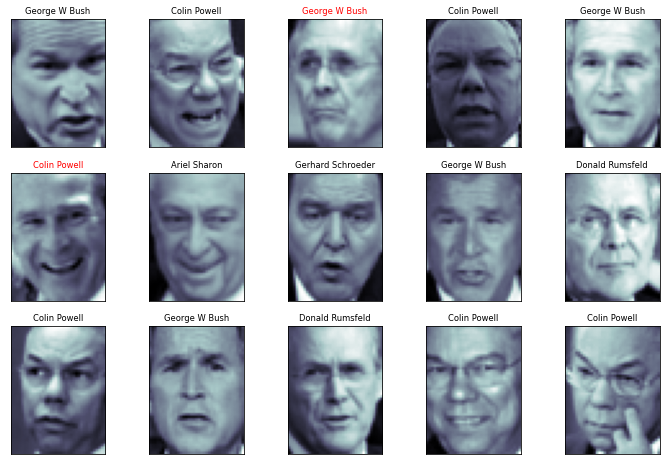

In [22]:
fig = plt.figure(figsize = (12, 8))

for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks = [], yticks = [])
    
    # Dataset real image
    ax.imshow(x_test[i].reshape((50, 37)), cmap = plt.cm.bone)
    
    # Class prediction with the trained model
    y_prediction = model_svm.predict(x_test_pca[i].reshape(1, -1))[0]
    
    # Set black labels for correct predictions (prediction classes equal to real classes),
    # and red labels for the  opposite
    color = 'black' if y_prediction == y_test[i] else 'red'
    
    ax.set_title(dataset_faces.target_names[y_prediction], fontsize = 'small', color = color)

In [23]:
print(model_svm.score(x_test_pca, y_test))

0.8416149068322981


The model has an efficiency of approximately 84%.<br />
It's possible to improve its performance trying to change the main components number, adjusting the hyperparameters of the PCA and SVM model, or even using a larger dataset.